In [1]:
# importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Setting no limit to display of rows and columns

pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, roc_auc_score

In [4]:
# Reading train and test files

train_df = pd.read_csv("Train.csv")
test_df = pd.read_csv("Test.csv")

# Exploratory Data Analysis

In [5]:
train_df.head()

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,CR_102659,04-JUL-04,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0
1,CR_189752,18-JUL-17,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1
2,CR_184637,15-MAR-17,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1
3,CR_139071,13-FEB-09,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1
4,CR_109335,13-APR-05,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1


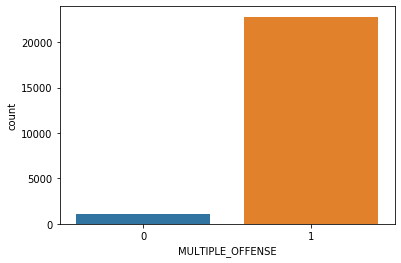

In [6]:
sns.countplot(train_df["MULTIPLE_OFFENSE"])

Looking at the distribution of target variable, we can say that the dataset is highly imbalanced where we have maximum incidents of hack.

Lets take a look at the independent variables

In [7]:
train_df.describe(include="all")

,INCIDENT_ID,DATE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
count,23856,23856,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23856.000000,23674.000000,23856.000000,23856.000000,23856.000000,23856.000000
unique,23856,9121,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,CR_93317,12-SEP-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,0.483778,24.791206,24.637450,4.276744,2.455609,6.154175,4.876509,0.972460,4.924128,1.244802,206.954519,0.974064,85.237383,72.674296,33.464747,0.955231
std,NaN,NaN,1.439738,15.240231,15.135093,2.944672,1.963095,4.471756,3.881931,1.453144,1.362625,1.119301,93.033348,1.167725,27.597226,43.297320,8.386834,0.206800
min,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,0.000000,7.000000,8.000000,2.000000,1.000000,3.000000,2.000000,0.000000,5.000000,1.000000,174.000000,1.000000,72.000000,29.000000,34.000000,1.000000
50%,NaN,NaN,0.000000,24.000000,24.000000,4.000000,3.000000,5.000000,4.000000,1.000000,5.000000,1.000000,249.000000,1.000000,98.000000,62.000000,34.000000,1.000000
75%,NaN,NaN,0.000000,36.000000,35.000000,6.000000,5.000000,8.000000,7.000000,1.000000,6.000000,1.000000,249.000000,1.000000,103.000000,107.000000,34.000000,1.000000


Through the details it seems that there are outliers in X_8, X_10, X_12. We will verify this through formula and graphs

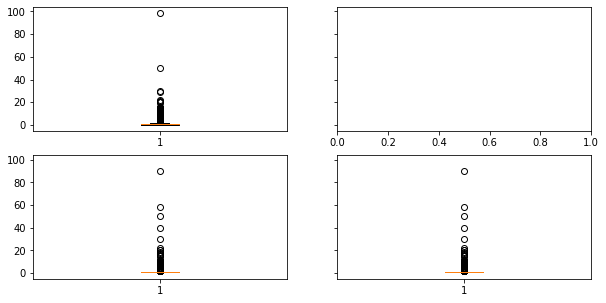

In [8]:
f, axs = plt.subplots(2, 2, sharey=True, figsize=(10,5))
axs[0, 0].boxplot(train_df["X_8"])
axs[1, 0].boxplot(train_df["X_10"])
axs[1, 1].boxplot(train_df["X_10"])
plt.show()

In [ ]:
# Check with outlier formula

In [9]:
train_df.dtypes

INCIDENT_ID          object
DATE                 object
X_1                   int64
X_2                   int64
X_3                   int64
X_4                   int64
X_5                   int64
X_6                   int64
X_7                   int64
X_8                   int64
X_9                   int64
X_10                  int64
X_11                  int64
X_12                float64
X_13                  int64
X_14                  int64
X_15                  int64
MULTIPLE_OFFENSE      int64
dtype: object

All features are of numeric except for INCIDENT_ID, DATE

We will try to use DATE but at a later stage.

For now, lets look at the data more.

In [10]:
# Checking missing values in train and test data

print(train_df.isnull().sum())
print("#"*30)
print(test_df.isnull().sum())

INCIDENT_ID           0
DATE                  0
X_1                   0
X_2                   0
X_3                   0
X_4                   0
X_5                   0
X_6                   0
X_7                   0
X_8                   0
X_9                   0
X_10                  0
X_11                  0
X_12                182
X_13                  0
X_14                  0
X_15                  0
MULTIPLE_OFFENSE      0
dtype: int64
##############################
INCIDENT_ID      0
DATE             0
X_1              0
X_2              0
X_3              0
X_4              0
X_5              0
X_6              0
X_7              0
X_8              0
X_9              0
X_10             0
X_11             0
X_12           127
X_13             0
X_14             0
X_15             0
dtype: int64


Only X_12 has missing values. This is the case in both train and test dataset.

We will be handling missing values at a later stage.

Let us continue with data analysis and check the count of unique values in train and test data

In [11]:
print(train_df.nunique())
print("#"*30)
print(test_df.nunique())

INCIDENT_ID         23856
DATE                 9121
X_1                     8
X_2                    52
X_3                    52
X_4                    10
X_5                     5
X_6                    19
X_7                    19
X_8                    24
X_9                     7
X_10                   24
X_11                  133
X_12                   23
X_13                   60
X_14                   62
X_15                   28
MULTIPLE_OFFENSE        2
dtype: int64
##############################
INCIDENT_ID    15903
DATE            7939
X_1                8
X_2               52
X_3               52
X_4               10
X_5                5
X_6               19
X_7               19
X_8               22
X_9                7
X_10              18
X_11             106
X_12              17
X_13              54
X_14              51
X_15              29
dtype: int64


The count of unique values of train and test are different for few features.
We'll combine train and test and check if the unique values are also different.

This can in a way be used to identify whether a feature is continuous or discrete.

In [12]:
main_df = pd.concat([train_df, test_df], ignore_index=True)
print(train_df.nunique())
print("#"*30)
print(main_df.nunique())

INCIDENT_ID         23856
DATE                 9121
X_1                     8
X_2                    52
X_3                    52
X_4                    10
X_5                     5
X_6                    19
X_7                    19
X_8                    24
X_9                     7
X_10                   24
X_11                  133
X_12                   23
X_13                   60
X_14                   62
X_15                   28
MULTIPLE_OFFENSE        2
dtype: int64
##############################
INCIDENT_ID         39759
DATE                 9942
X_1                     8
X_2                    52
X_3                    52
X_4                    10
X_5                     5
X_6                    19
X_7                    19
X_8                    27
X_9                     7
X_10                   26
X_11                  150
X_12                   24
X_13                   68
X_14                   69
X_15                   36
MULTIPLE_OFFENSE        2
dtype: int64


With the count of unique values of main_df and train_df we can consider the following variables as continuous:

- X_8, X_10, X_11, X_12, X_13, X_15

Following can be considered as discrete:

- X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_9

This is only an initial assumption, and we will be evaluating it more at later stage as few  assumed discrete features has too many categories.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D400391D08>,
      dtype=object)

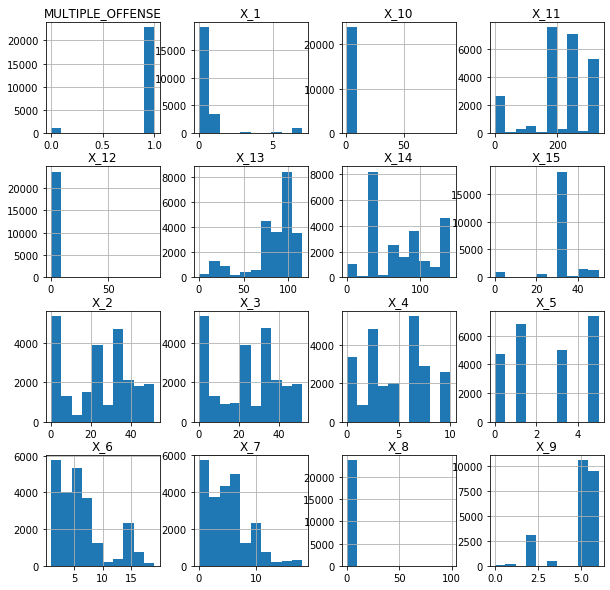

In [13]:
train_df.hist(figsize=(10,10))

We dont have any details about the features in the problem statement, so we'll have to deduce information from these features.
With so much records, we notice that the unique values in most of the features is very less, making us think that they can be categorical features.


Through the histogram of all the features, we can see that features - X_1, X_10, X_12, X_15, X_8,
All these features have few unique values but count of most of the unique values is very less.


Let's look if any of the features are correlated

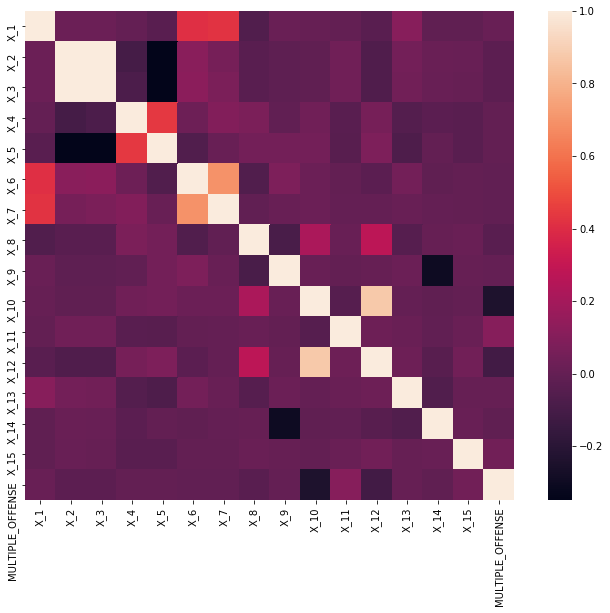

In [14]:
correlation_matrix = train_df.corr()
fig = plt.figure(figsize=(12,9))
sns.heatmap(correlation_matrix, square = True)
plt.show()

There is no high negative correlation between the features.
But there is a high correlation between 2 features - X_12, X_10.

As we know from above checks that X_12 has missing values, lets have a look at the values of these features and see if X_10 can help in computing the missing values.
Another approach can be that since X_10, and X_12 are highly correlated, we can drop one of the feature. Better option at initial analysis would be to drop X_12.

But for now, we will keep both features and see if X_10 can be used in computing missing values of X_12

In [15]:
train_df[["X_10", "X_12"]].head(20)
train_df[["X_10", "X_12"]].tail(20)

len(train_df.loc[train_df["X_10"] != train_df["X_12"], ["X_10", "X_12"]])

5950

In [16]:
print(train_df.loc[train_df["X_12"].isnull() == True, ["X_10", "X_12"]]["X_10"].value_counts())
print(test_df.loc[test_df["X_12"].isnull() == True, ["X_10", "X_12"]]["X_10"].value_counts())

1    181
4      1
Name: X_10, dtype: int64
1    124
2      3
Name: X_10, dtype: int64


On checking the values of X_10 and X_12 we noticed that their values are same in most of the cases, so to impute the missing values of X_12, we can fill in the missing values with corresponding value in X_10 and see how it works.


The missing values are mostly 1.

In [17]:
missing_val_index = train_df.loc[train_df["X_12"].isnull() == True, ["X_12"]].index 

for i in missing_val_index:
    train_df.iloc[[i], [13]] = train_df["X_10"][i]
    

missing_val_index = test_df.loc[test_df["X_12"].isnull() == True, ["X_12"]].index 

for i in missing_val_index:
    test_df.iloc[[i], [13]] = test_df["X_10"][i]

In [18]:
print(train_df["X_12"].isna().sum())
print(test_df["X_12"].isna().sum())

0
0


# Approach-1

In our first approach, we will only use numeric features to see how the models performes.

Also since the data is highly imbalanced, using the dataset as is for building model won't give us a good model. The accuracy will be good, but not the recall score.

So to handle this, we will be using oversampling technique SMOTE.

In [19]:
# Dropping "INCIDENT_ID" since it unique for all.
# Dropping "DATE" as in this approach we will only use numeric features

main_df = pd.concat([train_df, test_df], ignore_index=True)
main_df.drop(columns=["INCIDENT_ID", "DATE"], inplace=True)
main_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,36,34,2,1,5,6,1,6,1,174,1.0,92,29,36,0.0
1,1,37,37,0,0,11,17,1,6,1,236,1.0,103,142,34,1.0
2,0,3,2,3,5,1,0,2,3,1,174,1.0,110,93,34,1.0
3,0,33,32,2,1,7,1,1,6,1,249,1.0,72,29,34,1.0
4,0,33,32,2,1,8,3,0,5,1,174,0.0,112,29,43,1.0


In [20]:
# Again dividing the data into train and test

train_data = main_df.loc[main_df["MULTIPLE_OFFENSE"].isna() == False, ]
test_data = main_df.loc[main_df["MULTIPLE_OFFENSE"].isna() == True, ]
test_data.drop(columns=["MULTIPLE_OFFENSE"], inplace=True)
print(len(train_data))
print(len(test_data))

23856
15903


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [21]:
X = train_data.drop(columns=["MULTIPLE_OFFENSE"])
y = train_data["MULTIPLE_OFFENSE"]

We split the training data further into train and test so that we can validate the our model.

We then use SMOTE for oversampling

In [22]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

from imblearn.over_sampling import SMOTE
oversample = SMOTE(random_state=42)
ovr_sam_X, ovr_sam_y = oversample.fit_resample(X_train, list(y_train))
ovr_sam_y = pd.Series(ovr_sam_y)
ovr_sam_y.value_counts()

0.0    17086
1.0    17086
dtype: int64

In [23]:
ovr_sam_df = pd.concat([ovr_sam_X, pd.Series(ovr_sam_y)], axis=1)
ovr_sam_df.rename(columns={0: "MULTIPLE_OFFENSE"}, inplace=True)
ovr_sam_df.head()

,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,X_9,X_10,X_11,X_12,X_13,X_14,X_15,MULTIPLE_OFFENSE
0,0,4,4,6,5,5,6,0,5,1,174,1.0,103,93,34,1.0
1,0,21,23,4,1,5,6,1,6,1,249,1.0,103,29,34,1.0
2,0,36,34,2,1,3,5,1,2,1,316,1.0,92,142,34,1.0
3,0,24,24,0,0,5,6,1,2,1,0,1.0,72,142,34,1.0
4,0,4,4,6,5,5,6,1,6,1,316,1.0,72,29,34,1.0


Now we have oversampled data to train our model.
Lets start with Logistic Regression as our basemodel.

In [60]:
## LOGISTIC REGRESSION

lr = LogisticRegression()
lr.fit(ovr_sam_X, ovr_sam_y)
pred = lr.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
def model_eval(actual, predicted):
    print("Accuracy is: ", accuracy_score(actual, predicted))
    print("Recall Score is: ", recall_score(actual, predicted))
    print("CONFUSION MATRIX")
    print(confusion_matrix(actual, predicted))
    tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
    print("True Negative: ", tn)
    print("False Positive: ", fp)
    print("False Negative: ", fn)
    print("True Positive: ", tp)

In [63]:
def check_prec_rec_curve(model, actual, predicted):
    average_precision = average_precision_score(actual, predicted)
    print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))
    disp = plot_precision_recall_curve(model, X_test, y_test)
    disp.ax_.set_title('2-class Precision-Recall curve: '
                   'AP={0:0.2f}'.format(average_precision))

Accuracy is:  0.8566398390342053
Recall Score is:  0.8596983514556296
CONFUSION MATRIX
[[ 207   55]
 [ 800 4902]]
True Negative:  207
False Positive:  55
False Negative:  800
True Positive:  4902
####################
Average precision-recall score: 0.98


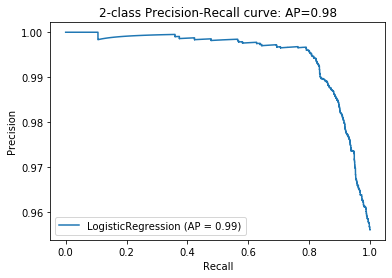

In [65]:
model_eval(y_test, pred)
print("#"*20)
check_prec_rec_curve(lr, y_test, pred)

The recall score achieved through LogisticRegression is 0.85 which seems to be a good score in terms of the base model. Alsoo the precision-recall score is good.

But we need to improve the prediction as major problem is, 800 cases are wrongly predicted as no hack.

Also there are 55 FP out of 264 Actual Negatives i.e. Out of 264 cases, 55 cases are wrongly predicted as hacks



We will now use RandomForest and check results.

Accuracy is:  0.9919517102615694
Recall Score is:  0.9952648193616275
CONFUSION MATRIX
[[ 241   21]
 [  27 5675]]
True Negative:  241
False Positive:  21
False Negative:  27
True Positive:  5675
####################
Average precision-recall score: 1.00


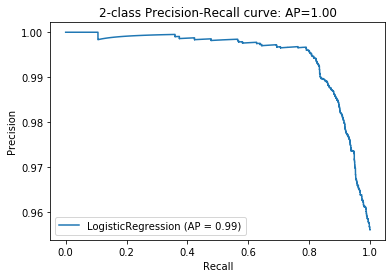

In [66]:
rf = RandomForestClassifier(random_state=42)
rf.fit(ovr_sam_X, ovr_sam_y)
pred = rf.predict(X_test)

model_eval(y_test, pred)
print("#"*20)
check_prec_rec_curve(lr, y_test, pred)

Through RandomForest, the count of FN has drastically came down to 27.

i.e. Out of 5702, 27 cases has been falsly detected as no hack and 21 cases has falsly predicted as hack out of 264.

We will try to tune the random forest model and see if it can bring down the FN count.

In [40]:
parameters = {'n_estimators': [100, 150, 200, 250],
    'min_samples_split': [2, 1, 3],
    'min_samples_leaf': [1, 2, 3],
    'min_impurity_decrease': [0.0, 0.1, 0.2, 0.5],
    'ccp_alpha': [0.0, 0.1, 0.2, 0.3]} 

rcv = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=parameters, 
                         scoring='recall')
rcv.fit(ovr_sam_X, ovr_sam_y)
rcv.best_estimator_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  FitFailedWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; g

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.5, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [41]:
rcv.best_score_

1.0

After parameter tuning, we got a hyper parameters values of the best RandomForest model. Lets use these parameters

Accuracy is:  0.9560697518443997
Recall Score is:  1.0
CONFUSION MATRIX
[[   0  262]
 [   0 5702]]
True Negative:  0
False Positive:  262
False Negative:  0
True Positive:  5702
####################
Average precision-recall score: 0.96


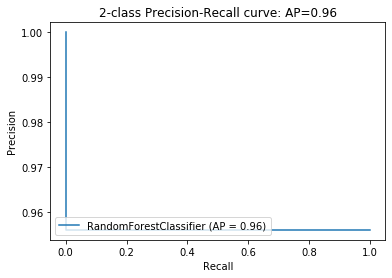

In [67]:
rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.5, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=3,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)
rf.fit(ovr_sam_X, ovr_sam_y)
pred = rf.predict(X_test)

model_eval(y_test, pred)
print("#"*20)
check_prec_rec_curve(rf, y_test, pred)

If we look only at the recall score, the model is very good.

Here we have achieved perfect recall score but we have compromised on the TN.

As we can see, the model did not predict even a single case as no hack. This should not happen as the model is not catering the actual need. To the model, every transation is a hack which is not the case. 

So we cannot use the tuned model.

Till now, the basic RandomForest model has given us the best results. Let us now try another model XGBoost

Accuracy is:  0.9988262910798122
Recall Score is:  0.9987723605752368
CONFUSION MATRIX
[[ 262    0]
 [   7 5695]]
True Negative:  262
False Positive:  0
False Negative:  7
True Positive:  5695
####################
Average precision-recall score: 1.00


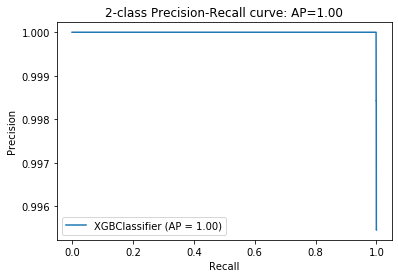

In [68]:
xgb1 = xgb.XGBClassifier(random_state=42, max_depth=7)
xgb1.fit(ovr_sam_X, ovr_sam_y)
pred = xgb1.predict(X_test)

model_eval(y_test, pred)
print("#"*20)
check_prec_rec_curve(xgb1, y_test, pred)

The XGBooost Classifier has provided better results than the random forest.

The Recall score is very good allong with the accuracy score.

The model has predicted all no hack cases correctly as the count of FP is 0.
The model has has falsely predicted 7 cases as no hacks out of 5702 hack cases.

We wont be doing hyper parameter tuning for XGBoost as we already know from Random Forest tuning that we will be getting a higher recall score, but that will lead to a very sturdy model which assumes every case as a hack case, which is not a good approach.

Now let us use this model to predict the outcome for test data

In [56]:
output = xgb1.predict(test_data)

In [57]:
def create_output_file(output, filename="default.csv"):
    output = pd.DataFrame(output, columns=["MULTIPLE_OFFENSE"])
    print(output["MULTIPLE_OFFENSE"].value_counts())
    inc_id = pd.DataFrame(test_df["INCIDENT_ID"], columns=["INCIDENT_ID"])
    pd.concat([inc_id, output], axis=1).to_csv(filename, index=False)
    print("File '{}' created successfully".format(filename))

In [58]:
create_output_file(output, "Ankit_Deshmukh_XGB_V2_0.csv")

1.0    15166
0.0      737
Name: MULTIPLE_OFFENSE, dtype: int64
File 'Ankit_Deshmukh_XGB_V2_0.csv' created successfully


The Score achieved for the test data is - 99.10.

# SUMMARY

During the analysis the main thing we identified that majority of the features are numeric in nature and the data is highly imbalanced with majority records of hack and minority records of no-hack.

There were outliers present in the dataset but we ignored them in our approach.

The features were not correlated with each other except for X_10 and X_12. As part of our basic approach, we did not remove the feature.

We simply removed the non-numeric features i.e. INCIDENT_ID and DATE.

Used oversampling technique SMOTE to deal with the imbalanced data.
We developed 3 models, tuned them and evaluated their performances - LogisticRegression, RandomForest, XGBoostClassifier

After evaluation, we conculuded that XBGoost is the best performing model.

# NOTE

This is the final file which we are using as the upload.

There are few other approaches as well which we tried but are not present in the file. Following are their analysis:

    -Approach-2
        - Cosndered X_1, X4, X5, X_9, MONTH as categorical data. Created their dummy variables
        - Scaled the continuous features
        - Used OneClassSVM novelty model to predict hacks.
        - The recall score achieved was 65
        
    - Approach-3
        - Used DATE feature and performed feature extracted and created 3 new features - date of the month, month and year
        - Cosndered X_1, X4, X5, X_9, MONTH as categorical data. Created their dummy variables
        - Used another anomaly detection algorithm - IsolationForest
        - The recall score achieved was 60
        
Through these approached we deduced that the anomaly detection algoriths are not performing well and considering few features as categorical is also not working for us.

So we went ahead with oversampling which gave us much better results.